In [1]:
#!pip install spacy

In [2]:
#!pip install wordcloud

# Load Libraries

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [4]:
elon_musk = pd.read_csv("Elon_musk.csv",encoding = "ISO-8859-1")
elon_musk.head(10)

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6,7,"Frodo was the underdoge,\nAll thought he would..."
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
8,9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...
9,10,The most entertaining outcome is the most likely


# # EDA/Data Cleaning/Data Analysis/Data Pre Processing

In [5]:
elon_musk.shape

(1999, 2)

In [6]:
elon_musk.isnull().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [7]:
elon_musk.dtypes

Unnamed: 0     int64
Text          object
dtype: object

In [8]:
elon_musk1=elon_musk.copy()

In [9]:
elon_musk1.head(10)

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6,7,"Frodo was the underdoge,\nAll thought he would..."
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
8,9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...
9,10,The most entertaining outcome is the most likely


In [10]:
elon_musk1 = elon_musk1.rename(columns={"Unnamed: 0":"Unnamed"})

In [11]:
elon_musk1.head(1)

,Unnamed,Text
0,1,@kunalb11 Im an alien


In [12]:
# drop a coloumn
elon_musk1.drop("Unnamed",inplace = True,axis=1)

In [13]:
elon_musk1

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [14]:
# '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
import re #regular expression
import string

def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)


In [15]:
elon_musk1['Text'] = elon_musk1.Text.apply(clean)

In [16]:
elon_musk1.Text

0                                            im an alien
1       idaacarmack ray tracing on cyberpunk with hdr ...
2                        joerogan spotify great interview
3                                  doge is underestimated
4       teslacn congratulations tesla china for amazin...
                              ...                        
1994    flcnhvy true it sounds so surreal but the nega...
1995    ppathole make sure to read ur terms amp condit...
1996                    teslagong ppathole samwise gamgee
1997                   ppathole altho dumb and dumber is 
1998                              progress update august 
Name: Text, Length: 1999, dtype: object

In [17]:
elon_musk1

,Text
0,im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,doge is underestimated
4,teslacn congratulations tesla china for amazin...
...,...
1994,flcnhvy true it sounds so surreal but the nega...
1995,ppathole make sure to read ur terms amp condit...
1996,teslagong ppathole samwise gamgee
1997,ppathole altho dumb and dumber is


In [18]:
# to remove the unnecessary space
for i in elon_musk1.Text:
    print(i.strip())

im an alien
idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it
joerogan spotify great interview
doge is underestimated
teslacn congratulations tesla china for amazing execution last year now on to the next for even more
happy new year of the ox
frodo was the underdoge
all thought he would fail
himself most of all httpstcozgxjfdzzrm
owensparks flcnhvy  haha thanks
flcnhvy  indeed tweets definitely do not represent realworld time allocation
the most entertaining outcome is the most likely
givedirectly just sent some
just agree to do clubhouse with kanyewest

geoffkeighley unrealengine its getting real
bought some dogecoin for lil x so he can be a toddler hodler
joshmanmode he definitely has issues but the sentencing seems a bit high
freewalletorg thanks for fixing
freewalletorg please unlock my account
astrojordy
this is true power haha
freewalletorg any crypto wallet that wont give you your private keys should be avoided at all costs
freewalletorg your app s

In [19]:
#Word frequency
freq = pd.Series(' '.join(elon_musk1['Text']).split()).value_counts() [:20]  # for top 20
freq

the               486
to                400
a                 355
is                355
of                315
spacex            239
in                219
amp               218
for               194
tesla             166
will              165
be                157
erdayastronaut    142
this              140
it                137
we                135
on                129
that              127
rt                127
but               126
dtype: int64

In [20]:
import nltk
# Natural Language Tool Kit , this is used for tokinization and stop words

In [21]:
#nltk.download("punkt") 
# in "punkt" all kind of tokinization and stop words are available

# Tokenization

In [22]:
#Tokenization: Natuaral Langauage Toolkit
from nltk import tokenize

In [23]:
words = tokenize.sent_tokenize(" ".join(elon_musk1.Text))

In [24]:
elon_musk1

,Text
0,im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,doge is underestimated
4,teslacn congratulations tesla china for amazin...
...,...
1994,flcnhvy true it sounds so surreal but the nega...
1995,ppathole make sure to read ur terms amp condit...
1996,teslagong ppathole samwise gamgee
1997,ppathole altho dumb and dumber is


In [25]:
words

[' i\x92m an alien idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it joerogan spotify great interview  doge is underestimated teslacn congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox  frodo was the underdoge\nall thought he would fail\nhimself most of all httpstcozgxjfdzzrm owensparks flcnhvy  haha thanks  flcnhvy  indeed tweets definitely do not represent realworld time allocation the most entertaining outcome is the most likely givedirectly just sent some just agree to do clubhouse with kanyewest  geoffkeighley unrealengine it\x92s getting real bought some dogecoin for lil x so he can be a toddler hodler joshmanmode he definitely has issues but the sentencing seems a bit high freewalletorg thanks for fixing freewalletorg please unlock my account astrojordy  this is true power haha  freewalletorg any crypto wallet that won\x92t give you your private keys should be avoided at all costs freew

In [26]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\apurv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
stop_words.append("the")

In [29]:
len(stop_words)

180

In [30]:
for i in words:
    if not i in stop_words:
        print(i)  # this list does not have any stop words mentioned in the list "stop_word"

 im an alien idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it joerogan spotify great interview  doge is underestimated teslacn congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox  frodo was the underdoge
all thought he would fail
himself most of all httpstcozgxjfdzzrm owensparks flcnhvy  haha thanks  flcnhvy  indeed tweets definitely do not represent realworld time allocation the most entertaining outcome is the most likely givedirectly just sent some just agree to do clubhouse with kanyewest  geoffkeighley unrealengine its getting real bought some dogecoin for lil x so he can be a toddler hodler joshmanmode he definitely has issues but the sentencing seems a bit high freewalletorg thanks for fixing freewalletorg please unlock my account astrojordy  this is true power haha  freewalletorg any crypto wallet that wont give you your private keys should be avoided at all costs freewalletorg your

# Removing the stop words

In [31]:
no_stop_words = [word for word in words if not word in stop_words]
print(no_stop_words[0:100]) 

[' i\x92m an alien idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it joerogan spotify great interview  doge is underestimated teslacn congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox  frodo was the underdoge\nall thought he would fail\nhimself most of all httpstcozgxjfdzzrm owensparks flcnhvy  haha thanks  flcnhvy  indeed tweets definitely do not represent realworld time allocation the most entertaining outcome is the most likely givedirectly just sent some just agree to do clubhouse with kanyewest  geoffkeighley unrealengine it\x92s getting real bought some dogecoin for lil x so he can be a toddler hodler joshmanmode he definitely has issues but the sentencing seems a bit high freewalletorg thanks for fixing freewalletorg please unlock my account astrojordy  this is true power haha  freewalletorg any crypto wallet that won\x92t give you your private keys should be avoided at all costs freew

In [32]:
len(no_stop_words)

1

# Stemming

In [33]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [34]:
stemmed_tokens = [ps.stem(word) for word in no_stop_words ]
print(stemmed_tokens[0:40]) 

[' i\x92m an alien idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it joerogan spotify great interview  doge is underestimated teslacn congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox  frodo was the underdoge\nall thought he would fail\nhimself most of all httpstcozgxjfdzzrm owensparks flcnhvy  haha thanks  flcnhvy  indeed tweets definitely do not represent realworld time allocation the most entertaining outcome is the most likely givedirectly just sent some just agree to do clubhouse with kanyewest  geoffkeighley unrealengine it\x92s getting real bought some dogecoin for lil x so he can be a toddler hodler joshmanmode he definitely has issues but the sentencing seems a bit high freewalletorg thanks for fixing freewalletorg please unlock my account astrojordy  this is true power haha  freewalletorg any crypto wallet that won\x92t give you your private keys should be avoided at all costs freew

In [35]:
len(stemmed_tokens)

1

# Feature Extraction

In [36]:
# to convert text data into numbers

In [37]:
# count vectoriser tells the frequency of a word.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(max_df = 5)

In [38]:
X = vectorizer.fit_transform(stemmed_tokens)

In [39]:
X

<1x4556 sparse matrix of type '<class 'numpy.int64'>'
	with 4556 stored elements in Compressed Sparse Row format>

In [40]:
X.toarray().shape

(1, 4556)

In [41]:
print(vectorizer.vocabulary_)

{'an': 156, 'alien': 116, 'idaacarmack': 1932, 'ray': 3186, 'tracing': 4129, 'on': 2772, 'cyberpunk': 909, 'with': 4475, 'hdr': 1700, 'is': 2075, 'nextlevel': 2679, 'have': 1694, 'you': 4532, 'tried': 4152, 'it': 2082, 'joerogan': 2128, 'spotify': 3711, 'great': 1626, 'interview': 2055, 'doge': 1075, 'underestimated': 4229, 'teslacn': 3957, 'congratulations': 793, 'tesla': 3951, 'china': 667, 'for': 1459, 'amazing': 145, 'execution': 1301, 'last': 2221, 'year': 4523, 'now': 2718, 'to': 4079, 'the': 4003, 'next': 2678, 'even': 1272, 'more': 2582, 'happy': 1677, 'new': 2675, 'of': 2756, 'ox': 2844, 'frodo': 1496, 'was': 4381, 'underdoge': 4228, 'all': 119, 'thought': 4044, 'he': 1701, 'would': 4499, 'fail': 1339, 'himself': 1751, 'most': 2587, 'httpstcozgxjfdzzrm': 1902, 'owensparks': 2840, 'flcnhvy': 1431, 'haha': 1657, 'thanks': 3997, 'indeed': 1990, 'tweets': 4198, 'definitely': 964, 'do': 1066, 'not': 2709, 'represent': 3277, 'realworld': 3213, 'time': 4062, 'allocation': 121, 'enter

In [42]:
#TFIDF - Term frequency inverse Document Frequencyt
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words

In [43]:
doc_vec = vectorizer.fit_transform(elon_musk1["Text"])

In [44]:
doc_vec

<1999x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 8240 stored elements in Compressed Sparse Row format>

In [45]:
doc_vec.shape

(1999, 1000)

In [46]:
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

C:\Users\apurv\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [47]:
df

,able,abort,absolutely,access,accurate,actual,actually,adamklotz,add,adding,...,yeah,year,years,yes,yesterday,yourfavgas,yup,zero,zogfotpik,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.356779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# N-Gram

In [48]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [49]:
top2_words = get_top_n2_words(elon_musk1["Text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(50)

,Bi-gram,Freq
0,rt spacex,71
1,will be,51
2,of the,47
3,this is,36
4,in the,36
5,to the,28
6,to be,28
7,we re,26
8,is the,24
9,should be,22


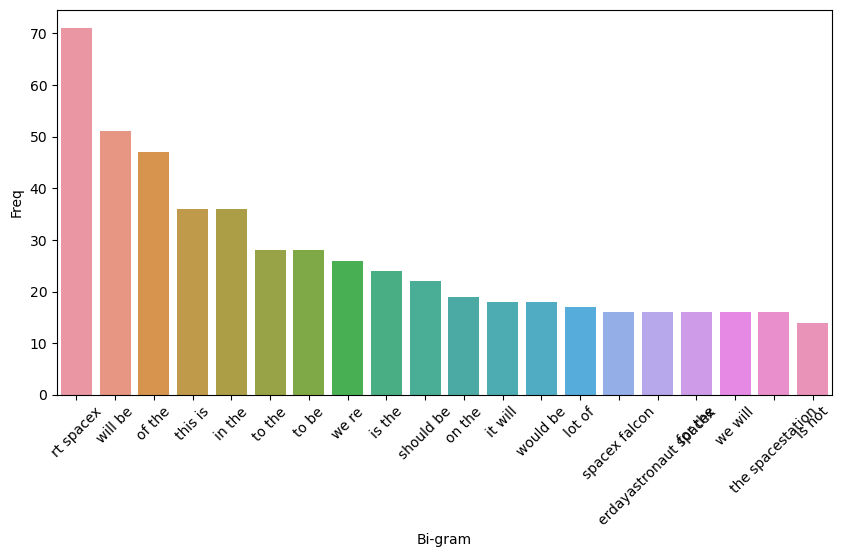

In [50]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])
plt.show()

In [51]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]


In [52]:
top3_words = get_top_n3_words(elon_musk1["Text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df.head(50)

,Tri-gram,Freq
0,rt spacex falcon,16
1,falcon first stage,9
2,to the spacestation,9
3,it will be,8
4,spacex falcon first,8
5,thesheetztweetz waemd spacex,8
6,of course still,7
7,course still love,7
8,still love you,7
9,one of the,7


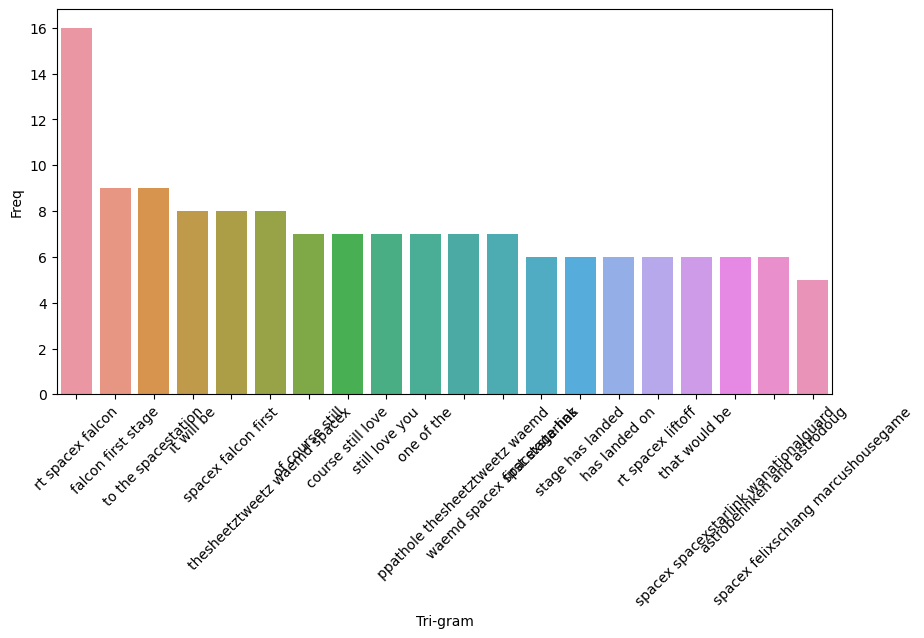

In [53]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])
plt.show()

# Word Cloud

In [54]:
string_Total = " ".join(elon_musk1["Text"])

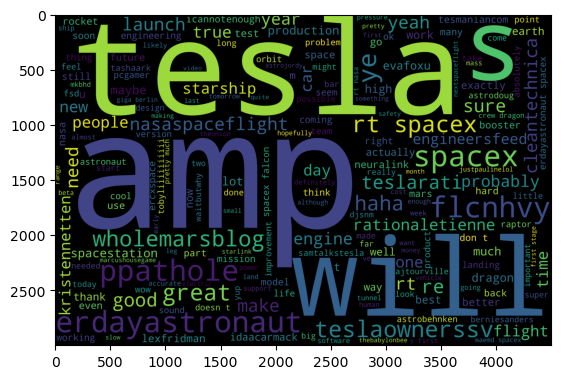

In [55]:
# wordcloud for entire corpus
from wordcloud import WordCloud

wordcloud_stw = WordCloud(background_color="black",width=4500,
                height=3000).generate(string_Total)
plt.imshow(wordcloud_stw)

# Sentimental analysis

In [64]:
!pip install textblob
from textblob import TextBlob
from textblob import Word

In [65]:
elon_musk['Text'][:5].apply(lambda x: TextBlob(x).sentiment)

0                      (-0.25, 0.75)
1                         (0.0, 0.0)
2                        (1.0, 0.75)
3                         (0.0, 0.0)
4    (0.3453125, 0.3666666666666667)
Name: Text, dtype: object

In [68]:
elon_musk['sentiment'] = elon_musk['Text'].apply(lambda x: TextBlob(x).sentiment[0] )
elon_musk[['Text','sentiment']].head(10)

,Text,sentiment
0,@kunalb11 Im an alien,-0.250000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0.000000
2,@joerogan @Spotify Great interview!,1.000000
3,@gtera27 Doge is underestimated,0.000000
4,@teslacn Congratulations Tesla China for amazi...,0.345313
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,0.485227
6,"Frodo was the underdoge,\nAll thought he would...",0.000000
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),0.300000
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,0.000000
9,The most entertaining outcome is the most likely,0.375000


In [69]:
from wordcloud import WordCloud, STOPWORDS
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");stopwords = STOPWORDS

In [73]:
elon_musk['word_count'] = elon_musk['Text'].apply(lambda x: len(str(x).split(" ")))
elon_musk[['Text','word_count']].head(10)

,Text,word_count
0,@kunalb11 Im an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,7
6,"Frodo was the underdoge,\nAll thought he would...",12
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),6
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,11
9,The most entertaining outcome is the most likely,8


<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment'>

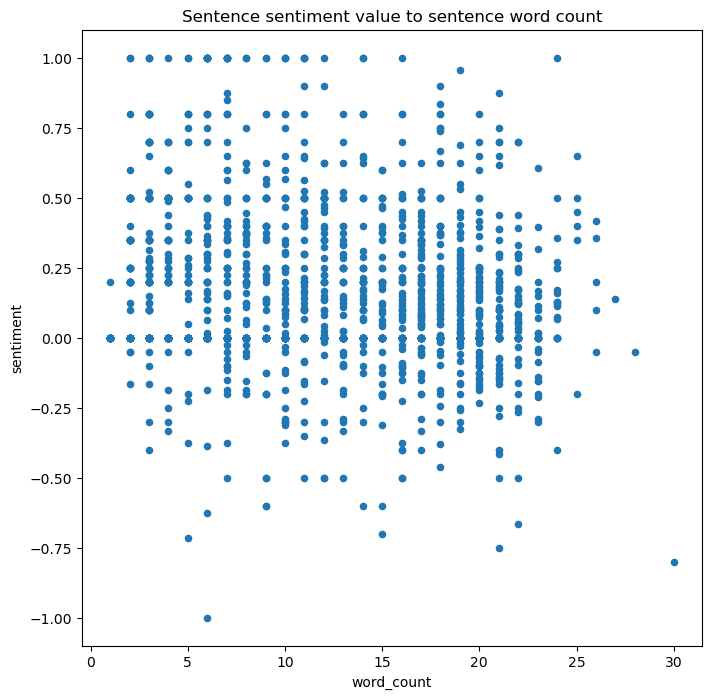

In [74]:
elon_musk.plot.scatter(x='word_count',y='sentiment',figsize=(8,8),title='Sentence sentiment value to sentence word count')